# Create a simple dataframe (table) in Pandas

Import necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pandas

Create a dataframe from numpy 2D array.

In [9]:
data = np.random.standard_normal(size = (4,3)) # Use np.random.standard_normal instead of np.random.randn
display(data)
df = pd.DataFrame(data)
display(df)
# Will give default names of columns (0, 1, 2 ,3) and rows (index)  - (0, 1, 2 ,3)

array([[ 1.0278309 , -0.18801596, -0.41535303],
       [ 0.69648426,  0.20723206,  0.36501004],
       [-2.27194625,  0.61986813, -1.99710205],
       [-0.64942622, -0.39052479, -1.26751829]])

,0,1,2
0,1.027831,-0.188016,-0.415353
1,0.696484,0.207232,0.365010
2,-2.271946,0.619868,-1.997102
3,-0.649426,-0.390525,-1.267518


Let's inspect the created dataframe more closer.

In [10]:
# info about df object
df.info()
# returns first few rows of df object
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      float64
 1   1       4 non-null      float64
 2   2       4 non-null      float64
dtypes: float64(3)
memory usage: 228.0 bytes


,0,1,2
0,1.027831,-0.188016,-0.415353
1,0.696484,0.207232,0.365010
2,-2.271946,0.619868,-1.997102
3,-0.649426,-0.390525,-1.267518


Rows and columns can have their own labels.

In [14]:
cols = ['BRCA1', 'BRCA2', 'CD28']
data = np.random.randint(0, 100, [4,3])
df = pd.DataFrame(data, columns = cols) 
# Use SHIFT+TAB to show name of method or its argument
# Use SHIFT+TABx2 to show full method docs
# At the end you can see the path to its file
df
# Now we have column names

,BRCA1,BRCA2,CD28
0,62,75,64
1,51,58,97
2,13,43,35
3,37,30,17


Create index labels through Python comprehension.

In [15]:
df2 = df.copy()
df2.index = [ 'Row' + str(i) for i in range(4) ]
df2

,BRCA1,BRCA2,CD28
Row0,62,75,64
Row1,51,58,97
Row2,13,43,35
Row3,37,30,17


Loc and iloc are two functions in Pandas that are used to slice a data set in a Pandas DataFrame. 
The function .loc is typically used for label indexing and can access multiple columns, while .iloc is used for integer indexing. 
Note that contrary to usual python slices, **both** the start and the stop are included

In [17]:
# Use the loc property to access and change some value using index (row label) and column label
print(df.loc[1, 'BRCA2'])
df.loc[1, 'BRCA2'] = 42
print(df.loc[1, 'BRCA2'])

# Add another row
df.loc[4] = [44, 52, 66]
df
# You can think of DataFrame as a dict of Series objects

# Use a list of booleans with the lenght equal to the number of rows (mask) to select specific rows
print(df.loc[[True, False, True, False, False]])

df

42
42
   BRCA1  BRCA2  CD28
0     62     75    64
2     13     43    35


,BRCA1,BRCA2,CD28
0,62,75,64
1,51,42,97
2,13,43,35
3,37,30,17
4,44,52,66


loc gets DataFrame row
s & columns by **labels/names** and iloc gets by integer **index/position**.

iloc performs almost 200% faster than loc. iloc takes advantage of the order of indices that are already sorted and is therefore faster.

In [19]:
# Use iloc to access the DataFrame with integer indices

# Get the first row
print(f"First row:\n{df.iloc[0]}") # Try to use fstrings for printing formatted output, they are much easier to read!

# Get rows 0 and 1
print(df.iloc[[0,1]])

# Indexing both axes
print(df.iloc[0,1])

# You can use a list of booleans (mask) to select rows the same way as with loc
print(df.iloc[[True, False, True, False, False]])

First row:
BRCA1    62
BRCA2    75
CD28     64
Name: 0, dtype: int64
   BRCA1  BRCA2  CD28
0     62     75    64
1     51     42    97
75
   BRCA1  BRCA2  CD28
0     62     75    64
2     13     43    35


In [31]:
# Remove row
df.drop(index=1)
display(df)
# Why it is still there? Check the docs...
df2 = df.drop(index=1)
df2

,BRCA1,BRCA2,CD28
0,62,75,64
1,51,42,97
2,13,43,35
3,37,30,17
4,44,52,66


,BRCA1,BRCA2,CD28
0,62,75,64
2,13,43,35
3,37,30,17
4,44,52,66


In [32]:
# Add another column
date = pd.date_range('20180219', periods = 5)
df['Date'] = date # Columns are kept as Series inside DataFrame object
df
# We can combine different data types inside dataframe

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23


# Dataframe info

Exploratory analysis can be very useful.

In [33]:
print(df.shape)
print(df.columns)
print(df.index)
print(df.values)
# Generate descriptive statistics.
df.describe()

(5, 4)
Index(['BRCA1', 'BRCA2', 'CD28', 'Date'], dtype='object')
Index([0, 1, 2, 3, 4], dtype='int64')
[[62 75 64 Timestamp('2018-02-19 00:00:00')]
 [51 42 97 Timestamp('2018-02-20 00:00:00')]
 [13 43 35 Timestamp('2018-02-21 00:00:00')]
 [37 30 17 Timestamp('2018-02-22 00:00:00')]
 [44 52 66 Timestamp('2018-02-23 00:00:00')]]


,BRCA1,BRCA2,CD28,Date
count,5.000000,5.000000,5.000000,5
mean,41.400000,48.400000,55.800000,2018-02-21 00:00:00
min,13.000000,30.000000,17.000000,2018-02-19 00:00:00
25%,37.000000,42.000000,35.000000,2018-02-20 00:00:00
50%,44.000000,43.000000,64.000000,2018-02-21 00:00:00
75%,51.000000,52.000000,66.000000,2018-02-22 00:00:00
max,62.000000,75.000000,97.000000,2018-02-23 00:00:00
std,18.365729,16.801786,30.849635,NaN


# Save dataframe to file and read from file

In [35]:
# Let's save it to file as .TSV
df.to_csv('gene_expression.tsv', sep='\t', index = None)
df

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23


In [36]:
# How can we load it from file?
df2 = pd.read_csv('gene_expression.tsv', sep = '\t')
df2
# We got the default index again

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23


# Manipulation of dataframes

In [34]:
df.sort_values(by = 'BRCA2', ascending=False)

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
4,44,52,66,2018-02-23
2,13,43,35,2018-02-21
1,51,42,97,2018-02-20
3,37,30,17,2018-02-22


In [37]:
# What will be the result?
df - df2

C:\Users\markom\AppData\Local\Temp\ipykernel_15792\2178760667.py:2: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df - df2


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [38]:
df3 = df.drop(['Date'], axis = 1) - df2.drop(['Date'], axis = 1)
# axis: Whether to drop labels from the index (0 / ‘index’) or columns (1 / ‘columns’)
df3['Date'] = df['Date']
df3

,BRCA1,BRCA2,CD28,Date
0,0,0,0,2018-02-19
1,0,0,0,2018-02-20
2,0,0,0,2018-02-21
3,0,0,0,2018-02-22
4,0,0,0,2018-02-23


In [46]:
# Apply function to dataframe element wise
def func(x):
    return (x + 42) if isinstance(x, int) else x

# df2 = df.applymap(func) <-- deprecated
df2 = df.map(func)
display(df)
display(df2)


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,79,72,59,2018-02-22
4,86,94,108,2018-02-23


In [48]:
# More pythonic way using labda function definition
# df2 = df.applymap(lambda x: x + 42 if isinstance(x, int) else x)
df2 = df.map(lambda x: x + 42 if isinstance(x, int) else x)
display(df)
display(df2)

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,79,72,59,2018-02-22
4,86,94,108,2018-02-23


In [40]:
df.apply(lambda x: x.max() - x.min()) # Runs function for every column (Series)

BRCA1                 49
BRCA2                 45
CD28                  80
Date     4 days 00:00:00
dtype: object

In [43]:
# Creates histogram of values
df.drop('Date', axis = 1).apply(lambda x: x.value_counts()) 

,BRCA1,BRCA2,CD28
13,1.0,NaN,NaN
17,NaN,NaN,1.0
30,NaN,1.0,NaN
35,NaN,NaN,1.0
37,1.0,NaN,NaN
42,NaN,1.0,NaN
43,NaN,1.0,NaN
44,1.0,NaN,NaN
51,1.0,NaN,NaN
52,NaN,1.0,NaN


In [44]:
# Transpose dataframe
df.T

,0,1,2,3,4
BRCA1,62,51,13,37,44
BRCA2,75,42,43,30,52
CD28,64,97,35,17,66
Date,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00


# Selection inside dataframe

In [49]:

df3 = df.map(lambda x: x + 42 if isinstance(x, int) else x)
display(df3)

# Build a boolean mask based on the cryteria 
mask = df3['BRCA2'] > 80 
print(mask)

# Use the mask to select rows that satisfy the criteria
display(df3[mask]) # As shown above, can also be used with loc and iloc



,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,79,72,59,2018-02-22
4,86,94,108,2018-02-23


0     True
1     True
2     True
3    False
4     True
Name: BRCA2, dtype: bool


,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
4,86,94,108,2018-02-23


In [50]:
# What is wrong with this?
mask = df3['BRCA2'] > 40 & df3['BRCA2'] < 60

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Priority of operators!
print((df3['BRCA2'] > 40) & (df3['BRCA2'] < 60))
df3[(df3['BRCA2'] > 40) & (df3['BRCA2'] < 60)]

In [ ]:
df

In [51]:
# Accessing dataframe - iloc vs. loc
display(df.loc[:2]) # Treats 2 as label and returns rows up to this label (including the row with the label)
display(df.iloc[:2]) # Treats 2 as index range, and always returns the first 2 rows


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20


In [52]:
new_df = df.sort_values(by = 'BRCA1')
display(new_df)
display(new_df.loc[:2]) # Treats 2 as label and returns rows up to this label (including the row with the label)
display(new_df.iloc[:2]) # Treats 2 as index range, and always returns the first 2 rows

,BRCA1,BRCA2,CD28,Date
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22
4,44,52,66,2018-02-23
1,51,42,97,2018-02-20
0,62,75,64,2018-02-19


,BRCA1,BRCA2,CD28,Date
2,13,43,35,2018-02-21


,BRCA1,BRCA2,CD28,Date
2,13,43,35,2018-02-21
3,37,30,17,2018-02-22


In [57]:
df.loc[3:5, ['BRCA1','BRCA2']]
# or df[['BRCA1','BRCA2']]

,BRCA1,BRCA2
3,37,30
4,44,52


In [55]:
%timeit df.loc[3:5, ['BRCA1','BRCA2']]
# or df[['BRCA1','BRCA2']]

342 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [58]:
df.iloc[3:5,0:2]

,BRCA1,BRCA2
3,37,30
4,44,52


In [56]:
%timeit df.iloc[3:5,0:2]

98.1 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
df.loc[3, 'BRCA1'] = 99

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. 
This can be used to group large amounts of data and compute operations on these groups.

In [64]:
display(df)
display(df2)
#df3 = df.append(df2) <-- deprecated
df3 = pd.concat([df, df2])
display(df3)
means_df = df3.groupby(by = 'Date').mean()
means_df
# Groupby output format – Series or DataFrame?


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,79,72,59,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,79,72,59,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28
Date,,,
2018-02-19,83.0,96.0,85.0
2018-02-20,72.0,63.0,118.0
2018-02-21,34.0,64.0,56.0
2018-02-22,89.0,51.0,38.0
2018-02-23,65.0,73.0,87.0


# Missing values


In [66]:
# pandas primarily uses the value np.nan to represent missing data
missing_df = df.copy()
missing_df['HLA'] = [3, 44, 45, np.nan, 66]
display(missing_df)
missing_df.to_csv('gene_expression.tsv', index=False, sep = '\t')
# Let's remove some data from file

,BRCA1,BRCA2,CD28,Date,HLA
0,62,75,64,2018-02-19,3.0
1,51,42,97,2018-02-20,44.0
2,13,43,35,2018-02-21,45.0
3,99,30,17,2018-02-22,NaN
4,44,52,66,2018-02-23,66.0


In [67]:
missing_df = pd.read_csv('gene_expression.tsv', sep = '\t')
missing_df

,BRCA1,BRCA2,CD28,Date,HLA
0,62,75,64,2018-02-19,3.0
1,51,42,97,2018-02-20,44.0
2,13,43,35,2018-02-21,45.0
3,99,30,17,2018-02-22,NaN
4,44,52,66,2018-02-23,66.0


In [68]:
# Fill NAN values with zero
missing_df.fillna(0)

,BRCA1,BRCA2,CD28,Date,HLA
0,62,75,64,2018-02-19,3.0
1,51,42,97,2018-02-20,44.0
2,13,43,35,2018-02-21,45.0
3,99,30,17,2018-02-22,0.0
4,44,52,66,2018-02-23,66.0


# Concat, join, merge of dataframes

In [70]:
df2 = df.map(lambda x: x + 42 if isinstance(x, int) else x)
display(df)
display(df2)
df3 = pd.concat([df, df2]) # Creates new object
display(df3)
display(df3.loc[1])


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,141,72,59,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23
0,104,117,106,2018-02-19
1,93,84,139,2018-02-20
2,55,85,77,2018-02-21
3,141,72,59,2018-02-22
4,86,94,108,2018-02-23


,BRCA1,BRCA2,CD28,Date
1,51,42,97,2018-02-20
1,93,84,139,2018-02-20


In [71]:
df3.reset_index(inplace=True, drop=True) # Drop the old index (do not save it as a new column)
df3

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23
5,104,117,106,2018-02-19
6,93,84,139,2018-02-20
7,55,85,77,2018-02-21
8,141,72,59,2018-02-22
9,86,94,108,2018-02-23


In [72]:
cols = ['Bcl-2', 'HIF1A']
data = np.random.randint(0, 100, [4,2])
df2 = pd.DataFrame(data, columns = cols)
df2['Date'] = pd.date_range('20180219', periods = 4)
display(df)
display(df2)
# SQL style merges, default is inner join
display(df.merge(df2, on ='Date')) # But we lost one row of df: (how ='left')

# Left join:
display(df.merge(df2, on = 'Date', how = "left"))

# How many output rows will we get if we change start date range on df2 to '20180221'?

,BRCA1,BRCA2,CD28,Date
0,62,75,64,2018-02-19
1,51,42,97,2018-02-20
2,13,43,35,2018-02-21
3,99,30,17,2018-02-22
4,44,52,66,2018-02-23


,Bcl-2,HIF1A,Date
0,29,32,2018-02-19
1,19,60,2018-02-20
2,43,73,2018-02-21
3,65,57,2018-02-22


,BRCA1,BRCA2,CD28,Date,Bcl-2,HIF1A
0,62,75,64,2018-02-19,29,32
1,51,42,97,2018-02-20,19,60
2,13,43,35,2018-02-21,43,73
3,99,30,17,2018-02-22,65,57


,BRCA1,BRCA2,CD28,Date,Bcl-2,HIF1A
0,62,75,64,2018-02-19,29.0,32.0
1,51,42,97,2018-02-20,19.0,60.0
2,13,43,35,2018-02-21,43.0,73.0
3,99,30,17,2018-02-22,65.0,57.0
4,44,52,66,2018-02-23,NaN,NaN


# Plotting

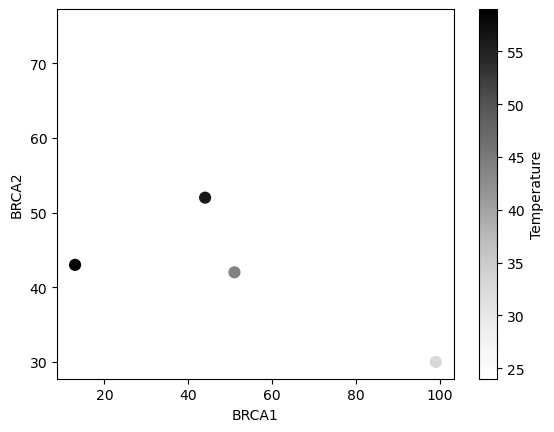

In [73]:
# Let's visualize some data
df2 = df
df2['Temperature'] = np.random.randint(20, 60, [5,1])
df2.plot.scatter(x = 'BRCA1', y = 'BRCA2', c = 'Temperature', s = 60);

<Axes: xlabel='Date'>

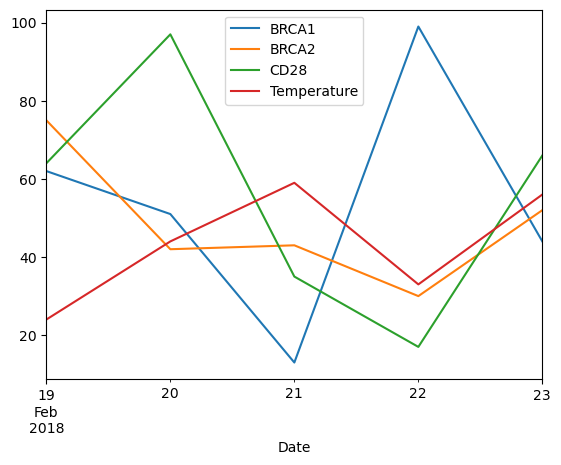

In [75]:
df.plot(x ='Date')